# Week 6 Practice

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

Download the data and save it as a pandas DataFrame.

In [3]:
initial_data = yf.download("AAPL AMZN FB GOOG MSFT TSLA SPY ^VIX", start="2019-10-01", end="2020-09-30")

[*********************100%***********************]  8 of 8 completed


In [4]:
initial_data.head()

Adj Close                                                    \
                 AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                      
2019-09-30  55.442406  1735.910034  178.080002  1219.000000  137.465027   
2019-10-01  55.595886  1735.650024  175.809998  1205.099976  135.527100   
2019-10-02  54.202213  1713.229980  174.600006  1176.630005  133.134323   
2019-10-03  54.662643  1724.420044  179.380005  1187.829956  134.745972   
2019-10-04  56.194942  1739.650024  180.449997  1209.000000  136.565262   

                                                  Close               ...  \
                   SPY       TSLA       ^VIX       AAPL         AMZN  ...   
Date                                                                  ...   
2019-09-30  291.139923  48.174000  16.240000  55.992500  1735.910034  ...   
2019-10-01  287.676880  48.938000  18.559999  56.147499  1735.650024  ...   
2019-10-02  282.595184  48.625999  20.559999  54.740002  1713.229980  ...   
2019-10-03  284.910400  46.605999  19.120001  55.205002  1724.420044  ...   
2019-10-04  288.765839  46.285999  17.040001  56.752499  1739.650024  ...   

                 Open                Volume                              \
                 TSLA       ^VIX       AAPL     AMZN        FB     GOOG   
Date                                                                      
2019-09-30  48.599998  17.230000  103909600  2644700  10740000  1404100   
2019-10-01  48.299999  16.020000  139223200  3084500  17073000  1273500   
2019-10-02  48.658001  18.750000  138449200  3301100  16151700  1615100   
2019-10-03  46.372002  20.110001  114426000  3468200  16086300  1621200   
2019-10-04  46.321999  19.420000  138478800  2471900  10430200  1162400   

                                                
                MSFT        SPY      TSLA ^VIX  
Date                                            
2019-09-30  17280900   51662400  29399000    0  
2019-10-01  21466600   88242400  30813000    0  
2019-10-02  30521700  122539500  28157000    0  
2019-10-03  24132900   85278800  75422500    0  
2019-10-04  22897700   65091200  39975000    0  

[5 rows x 48 columns]

In [5]:
initial_data['Adj Close'].head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,55.442406,1735.910034,178.080002,1219.000000,137.465027,291.139923,48.174000,16.240000
2019-10-01,55.595886,1735.650024,175.809998,1205.099976,135.527100,287.676880,48.938000,18.559999
2019-10-02,54.202213,1713.229980,174.600006,1176.630005,133.134323,282.595184,48.625999,20.559999
2019-10-03,54.662643,1724.420044,179.380005,1187.829956,134.745972,284.910400,46.605999,19.120001
2019-10-04,56.194942,1739.650024,180.449997,1209.000000,136.565262,288.765839,46.285999,17.040001


Set the Adj Closed data as a new DataFrame we will use.

In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-09-30 to 2020-09-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   AMZN    253 non-null    float64
 2   FB      253 non-null    float64
 3   GOOG    253 non-null    float64
 4   MSFT    253 non-null    float64
 5   SPY     253 non-null    float64
 6   TSLA    253 non-null    float64
 7   ^VIX    253 non-null    float64
dtypes: float64(8)
memory usage: 17.8 KB


In [7]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,55.442406,1735.910034,178.080002,1219.000000,137.465027,291.139923,48.174000,16.240000
2019-10-01,55.595886,1735.650024,175.809998,1205.099976,135.527100,287.676880,48.938000,18.559999
2019-10-02,54.202213,1713.229980,174.600006,1176.630005,133.134323,282.595184,48.625999,20.559999
2019-10-03,54.662643,1724.420044,179.380005,1187.829956,134.745972,284.910400,46.605999,19.120001
2019-10-04,56.194942,1739.650024,180.449997,1209.000000,136.565262,288.765839,46.285999,17.040001


In [8]:
data.tail()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-09-23,107.120003,2999.860107,249.020004,1415.209961,200.589996,322.640015,380.359985,28.580000
2020-09-24,108.220001,3019.790039,249.529999,1428.290039,203.190002,323.500000,387.790009,28.510000
2020-09-25,112.279999,3095.129883,254.820007,1444.959961,207.820007,328.730011,407.339996,26.379999
2020-09-28,114.959999,3174.050049,256.820007,1464.520020,209.440002,334.190002,421.200012,26.190001
2020-09-29,114.089996,3144.879883,261.790009,1469.329956,207.259995,332.369995,419.070007,26.270000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D87FAFB50>,
      dtype=object)

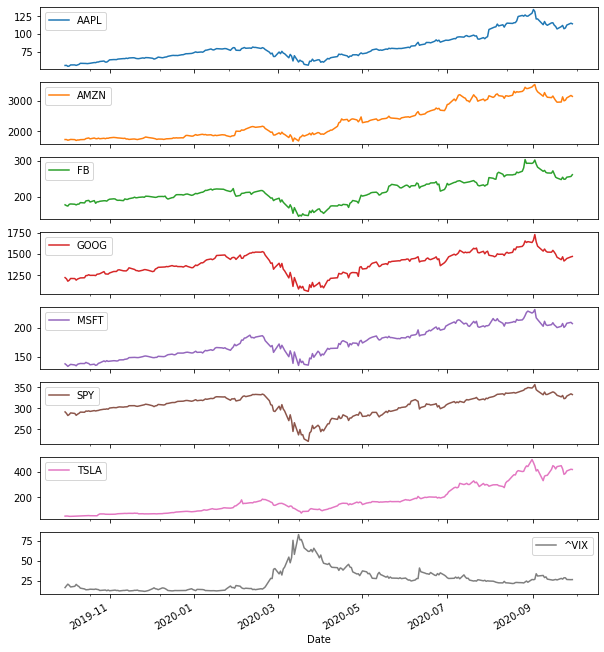

In [9]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [10]:
data.describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00
mean,80.65,2315.71,213.87,1380.05,174.64,305.89,175.45,26.27
std,18.98,556.25,33.11,130.10,25.95,24.92,115.19,13.98
min,54.20,1676.61,146.01,1056.62,133.13,221.09,46.29,11.54
25%,66.22,1804.66,190.39,1291.80,151.32,292.42,85.05,14.38
50%,76.79,2133.91,210.10,1393.18,172.80,308.43,149.27,24.76
75%,91.04,2764.41,235.65,1480.32,200.59,323.50,215.96,31.89
max,134.18,3531.45,303.91,1728.28,231.65,356.27,498.32,82.69


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.diff().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,0.153481,-0.260010,-2.270004,-13.900024,-1.937927,-3.463043,0.764,2.320000
2019-10-02,-1.393673,-22.420044,-1.209991,-28.469971,-2.392776,-5.081696,-0.312,2.000000
2019-10-03,0.460430,11.190063,4.779999,11.199951,1.611649,2.315216,-2.020,-1.439999
2019-10-04,1.532299,15.229980,1.069992,21.170044,1.819290,3.855438,-0.320,-2.080000


In [12]:
data.diff().describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,0.23,5.59,0.33,0.99,0.28,0.16,1.47,0.04
std,2.29,54.50,5.53,30.02,4.47,5.69,12.77,3.51
min,-10.52,-187.96,-24.27,-135.40,-23.29,-29.05,-88.11,-17.64
25%,-0.58,-18.22,-1.96,-9.67,-1.47,-1.38,-2.05,-1.12
50%,0.25,6.42,0.56,2.97,0.43,0.71,0.63,-0.18
75%,1.23,28.13,3.10,15.58,2.06,2.59,4.80,0.73
max,10.05,234.87,23.09,107.81,19.67,20.91,55.64,24.86


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [13]:
data.pct_change().round(4).head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,0.0028,-0.0001,-0.0127,-0.0114,-0.0141,-0.0119,0.0159,0.1429
2019-10-02,-0.0251,-0.0129,-0.0069,-0.0236,-0.0177,-0.0177,-0.0064,0.1078
2019-10-03,0.0085,0.0065,0.0274,0.0095,0.0121,0.0082,-0.0415,-0.0700
2019-10-04,0.0280,0.0088,0.0060,0.0178,0.0135,0.0135,-0.0069,-0.1088


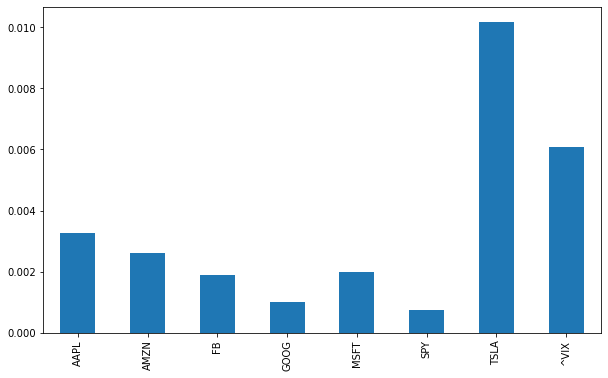

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,0.0028,-0.0001,-0.0128,-0.0115,-0.0142,-0.0120,0.0157,0.1335
2019-10-02,-0.0254,-0.0130,-0.0069,-0.0239,-0.0178,-0.0178,-0.0064,0.1023
2019-10-03,0.0085,0.0065,0.0270,0.0095,0.0120,0.0082,-0.0424,-0.0726
2019-10-04,0.0276,0.0088,0.0059,0.0177,0.0134,0.0134,-0.0069,-0.1152


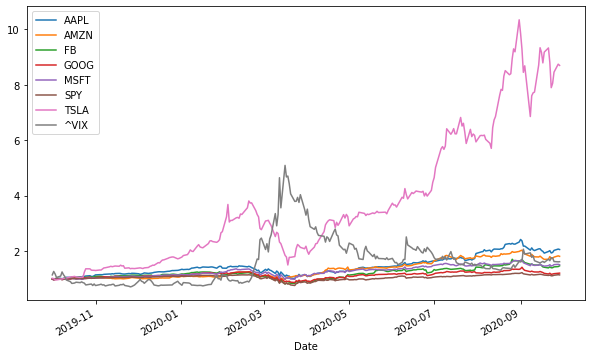

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample('1w', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-10-06,56.194942,1739.650024,180.449997,1209.000000,136.565262,288.765839,46.285999,17.040001
2019-10-13,58.472343,1731.920044,184.190002,1215.449951,138.107697,290.659180,49.577999,15.580000
2019-10-20,58.521858,1757.510010,185.850006,1245.489990,135.863251,292.317139,51.389999,14.250000
2019-10-27,61.039375,1761.329956,187.889999,1265.130005,139.145874,295.878296,65.625999,12.650000
2019-11-03,63.326683,1791.439941,193.619995,1273.739990,142.102234,300.332184,62.661999,12.300000


In [18]:
data.resample('1m', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2019-09-30,55.442406,1735.910034,178.080002,1219.000000,137.465027,291.139923,48.174000,16.24
2019-10-31,61.579021,1776.660034,191.649994,1260.109985,141.756165,297.575439,62.984001,13.22
2019-11-30,66.354729,1800.800049,201.639999,1304.959961,150.185318,308.347168,65.987999,12.62
2019-12-31,72.909500,1847.839966,205.250000,1337.020020,156.455429,317.306335,83.666000,13.78
2020-01-31,76.847343,2008.719971,201.910004,1434.229980,168.886551,317.178192,130.113998,18.84


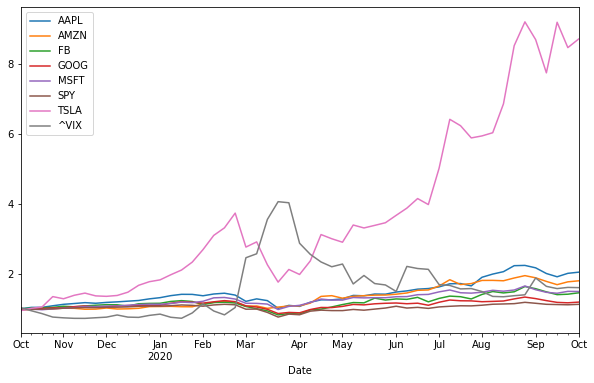

In [19]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last(
).plot(figsize=(10, 6))

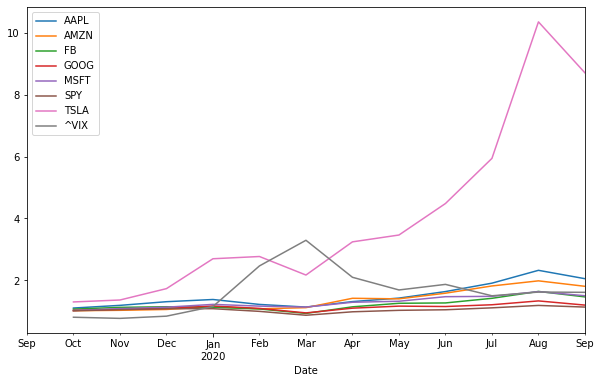

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
).plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [21]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2020-09-23,107.120003
2020-09-24,108.220001
2020-09-25,112.279999
2020-09-28,114.959999
2020-09-29,114.089996


In [22]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2019-10-11,58.472343,54.202213,55.948387,1.193578,55.895414,58.472343,58.038267
2019-10-14,58.388180,54.202213,56.242965,1.400416,56.197418,58.472343,58.300702
2019-10-15,58.252033,54.202213,56.508579,1.511534,56.203606,58.472343,58.264200
2019-10-16,58.016861,54.662643,56.890044,1.335958,56.582346,58.472343,58.078696
2019-10-17,58.242130,55.548851,57.247993,1.137668,57.487118,58.472343,58.201272


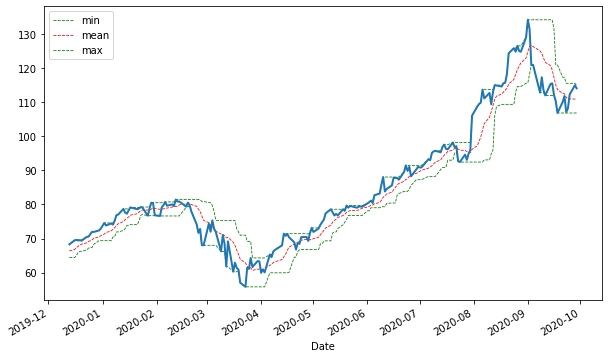

In [23]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [24]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2020-09-23,107.120003,117.882499,108.407965
2020-09-24,108.220001,116.967374,108.694367
2020-09-25,112.279999,116.330873,109.051306
2020-09-28,114.959999,115.838498,109.452911
2020-09-29,114.089996,115.090998,109.799507


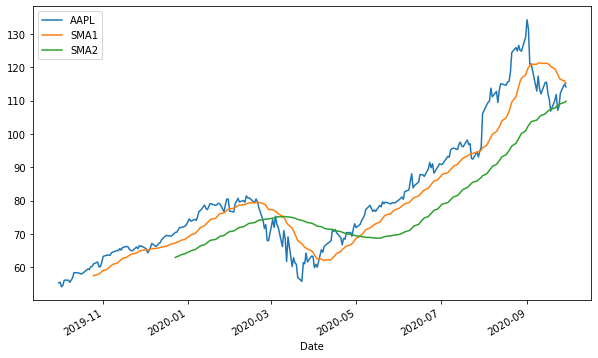

In [25]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

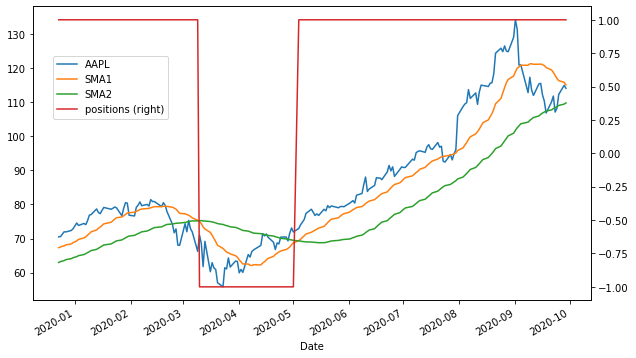

In [26]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [27]:
Corr_data = data[['SPY', '^VIX']].dropna()
Corr_data.tail()

,SPY,^VIX
Date,,
2020-09-23,322.640015,28.580000
2020-09-24,323.500000,28.510000
2020-09-25,328.730011,26.379999
2020-09-28,334.190002,26.190001
2020-09-29,332.369995,26.270000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D890146A0>,
      dtype=object)

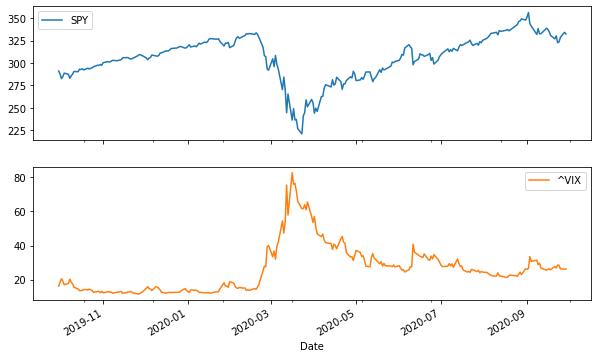

In [28]:
Corr_data.plot(subplots=True, figsize=(10, 6))

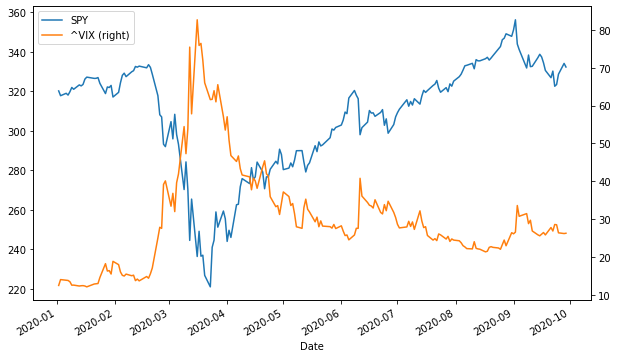

In [29]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [30]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,SPY,^VIX
Date,,
2019-09-30,NaN,NaN
2019-10-01,-0.011966,0.133531
2019-10-02,-0.017822,0.102339
2019-10-03,0.008159,-0.072612
2019-10-04,0.013441,-0.115171


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D88EF8D00>,
      dtype=object)

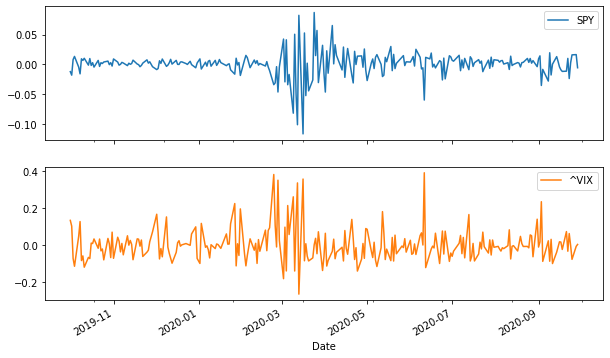

In [31]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D88733550>,
      dtype=object)

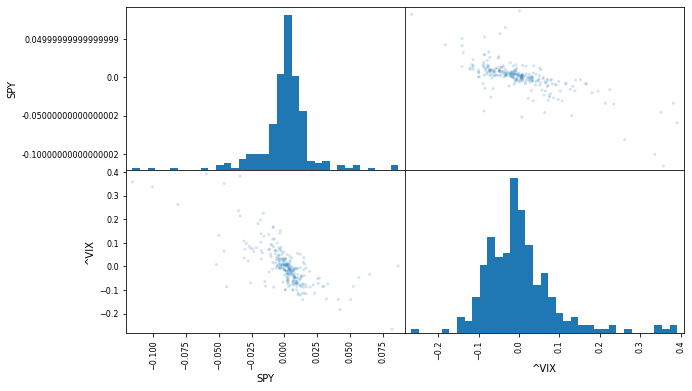

In [32]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

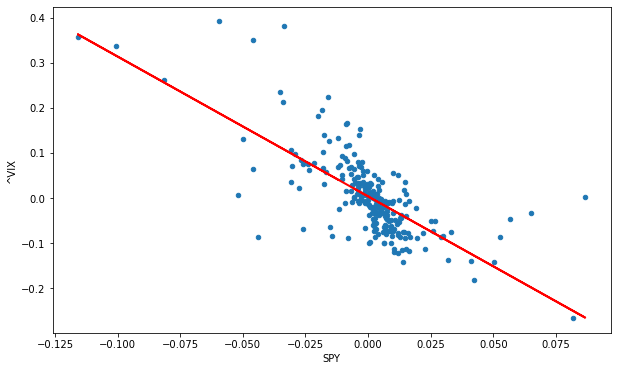

In [33]:
reg = np.polyfit(sprets['SPY'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='SPY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['SPY'], np.polyval(reg, sprets['SPY']), 'r', lw=2);

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [34]:
sprets.corr()

,SPY,^VIX
SPY,1.000000,-0.723257
^VIX,-0.723257,1.000000


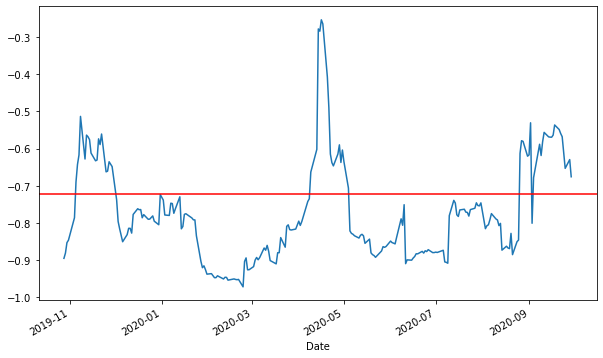

In [35]:
ax = sprets['SPY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');